# Capstone Project - The Battle of Neighborhoods (complete report)

## Description of the problem:

Denmark is a Scandinavian country located in the north of Europe and is known as one of the big leading nations toward green mobility and the reduction of fossil fuel consumption. Using bikes is one of the most common movements toward a green community in Denmark. In fact, nearly [60%](https://en.wikipedia.org/wiki/Cycling_in_Copenhagen#cite_note-Bicycle_Account-4) of Danish people use bike for their daily needs [1] Here I have provided some of the main reasons I assume that have made bikes very useful in Denmark:
- The geographic condition of Denmark as a country that does not have high variation of altitude has made it a good spot for bike lovers. 
- In other words, having no hills and ups and downs in the streets make it very easy for different age range of people to use their bike for their daily commuting route to their school, work and etc. 
- The high taxes of the fuel and rather expensive prices for public transportations, have turned bikes very valuable means of transportation for people

## Now whats the problem/issue?

Despite the fact that using bikes is very common in Denmark, the bike services are not very reasonable. This means there are either not enough  spots that you can have your bikes fixed, or the prices are very expensive.

## Let's dig into the problem :


Based on DTU website, there are currently [12894](http://dtu-studiedatavarehus.ait.dtu.dk/vis_noegletal_bestand.aspx?aar=2020&ret=0&udd=0&kon=0&alder=0&nt=0&vd=0&land=0&region=&kv=0&eks=) active students studying in the technical university of Denmark (DTU) [2], which is one of the most famous engineering universities in the Europe with the QS world University ranking of [103](https://www.dtu.dk/Om-DTU/Tal-og-analyser/Ranking/QS-World-University-Rankings) [3]
When it comes to students, financial aspects become one of the most crucial points. However, there are two issues I have faced as a student in DTU:
1. There is high price of bike services(it can be around [300](https://www.fribikeshop.dk/service) dkk for a normal service) [4]
2. There are not sufficient service points around DTU
3. There is a time limit

For me, the third one was very important. Imagine you are stuck somewhere in a cold day at the middle of the night, but you face a flat tire. Some areas are not covered by the public transport after some hours of the day (for example after 8 pm), imagine you face an issue in your bike. what can you do?? :)

## What I am suggesting:

As a person who has lived in Denmark I totally understand that the reason for high service peices in Denmark is due to the high salaries and in general high service fees, but how can we do something that both students (usually low income compared with normal people) and service providers (expecting reasonable income) have benefit?
My suggestion is:

1. having low peices means lower profit, but in a community of nearly 13000 people (students of DTU), even a profit of one cent can be very big
2. Providing remote services. Many of us have seen small vending machines in the metro stations and so on, that provide some small services like drinks, chips and so on. why not having the same thing for bike services? 
3. DTU has different sections inside the campus that provides tools such as wrench, keys and so on(24h), so, just providing a vending machine that has some very basic things such as lights, tubes, tires, and so on can be amazingly handy for emergency situations
4. despite a normal vending machine that requires cooling systems, normal bike facilities can be exempt of that, so no specific design would be required

## How to use data analysis to fix this issue

The best usage of data is to find the best spot for placing a bike repair shop or as stated earlier, setting a vending machine to sell the necessary emergency things required for having a self service repair for the community of people using bikes around DTU. The topics that can be covered are:

- Finding the population of people living in the vicinity of DTU
- showing the best spots that can be spotted easier for people (around stations, DTU labs, bike shelters, etc), so you can do the repair in a relax area (no wind, rain, snow, etc)
- Showing the profit of giving discounts, outside of working hour services, etc, to attract costumers



## The Data that can be used:

- Importing the map of Denmark, showing the location of DTU on the map
- Showing the neighborhoods (postal codes) that are covered around the university, so those can be benefited also 

#### Importing all the necesarry libraries

In [4]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


## Data required

### The postal codes and coordination data in Denmark

The data regarding the post code and coordination data of Denmark has been taken from the following website:
- https://www.aggdata.com/free/denmark-postal-codes

In [5]:
#I found the data of all postal codes in Denmark in the following address :https://www.regionh.dk/english/about-the-capital-region/facts-about-the-region/Pages/Postal-codes.aspx

#After converting the pdf to csv, I read the csv file here:
import pandas as pd

df_DK = pd.read_csv("F:/DTU/Data Science/dk_postal_codes.CSV",encoding= 'unicode_escape')


In [6]:
df_DK.head()

,Postal Code,Place Name,Latitude,Longitude
0,800,Høje Taastrup,55.6500,12.2833
1,877,Valby,55.7333,12.1729
2,900,København C,55.6777,12.5709
3,910,København C,55.6777,12.5709
4,929,København C,55.6777,12.5709


In [7]:
df_DK.shape

(1182, 4)

### Data cleaning

In [8]:
# Cleaning the data
# puting the Borough names:

df_DK.rename(columns = {"Place Name" : "Borough"}, inplace = True)
df_DK

,Postal Code,Borough,Latitude,Longitude
0,800,Høje Taastrup,55.6500,12.2833
1,877,Valby,55.7333,12.1729
2,900,København C,55.6777,12.5709
3,910,København C,55.6777,12.5709
4,929,København C,55.6777,12.5709
...,...,...,...,...
1177,9940,Læsø,57.5581,10.4927
1178,9970,Strandby,57.5000,10.5000
1179,9981,Jerup,57.5333,10.4333
1180,9982,Ålbæk,57.5956,10.4094


In [9]:
df_DK["Borough"].value_counts()

København K        278
København V        185
Frederiksberg C    108
Aalborg              4
Odense C             4
                  ... 
Frederiksværk        1
Mariager             1
Hellerup             1
Ølgod                1
Nærum                1
Name: Borough, Length: 594, dtype: int64

# Importing the population data per region of Denmark

#### the data has been extracted from Denmarks statistical database : https://www.dst.dk/en

In [10]:
df_DKPOP = pd.read_csv("F:/DTU/Data Science/dk_population.CSV",encoding= 'unicode_escape')

In [11]:
df_DKPOP.head()

,Area,population
0,Copenhagen,637936
1,Frederiksberg,104351
2,Dragør,14497
3,Tårnby,42757
4,Albertslund,27500


In [12]:
df_DKPOP.rename(columns = {"Area" : "Borough"}, inplace = True)


In [13]:
df_DKPOP

,Borough,population
0,Copenhagen,637936
1,Frederiksberg,104351
2,Dragør,14497
3,Tårnby,42757
4,Albertslund,27500
...,...,...
94,Morsø,20135
95,Rebild,30438
96,Thisted,43217
97,Vesthimmerlands,36458


### Now lets merge both tables to have a unique table containing all data

In [14]:
df3 = pd.merge(df_DK,df_DKPOP,on='Borough')
df3

,Postal Code,Borough,Latitude,Longitude,population
0,2000,Frederiksberg,55.6794,12.5346,104351
1,2600,Glostrup,55.6667,12.4000,23342
2,2605,Brøndby,55.6500,12.4167,35215
3,2610,Rødovre,55.6806,12.4537,41025
4,2620,Albertslund,55.6569,12.3638,27500
...,...,...,...,...,...
69,9100,Aalborg,57.0480,9.9187,219310
70,9700,Brønderslev,57.2702,9.9410,36183
71,9800,Hjørring,57.4642,9.9823,64213
72,9900,Frederikshavn,57.4407,10.5366,59187


### Adding the area details aswell (it helps separating the regions as some municipilities are divided to some sub regions that make the compariosion harder)

In [15]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_municipalities_of_Denmark').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of municipalities of Denmark - Wikipedia</title>


LAU-1code 1,Municipality,Administrative Center,Area(km²),Population(2012-01-01),Region
101,Copenhagen,Copenhagen,74.7,"549,050",Capital
751,Aarhus,Aarhus,467.8,"314,545",Central
851,Aalborg,Aalborg,1137.2,"201,142",North
461,Odense,Odense,305.7,"191,610",South
561,Esbjerg,Esbjerg,794.7,"115,112",South
630,Vejle,Vejle,1058.8,"108,021",South
147,Frederiksberg,Frederiksberg,8.1,"100,215",Capital
730,Randers,Randers,747.6,"95,756",Central
791,Viborg,Viborg,1408.7,"93,819",Central
621,Kolding,Kolding,607.1,"89,412",South


In [16]:
df_data = pd.read_html(tab)
df=df_data[0]
df.head(12)

,LAU-1code 1,Municipality,Administrative Center,Area(km²),Population(2012-01-01),Region
0,101,Copenhagen,Copenhagen,74.7,549050,Capital
1,751,Aarhus,Aarhus,467.8,314545,Central
2,851,Aalborg,Aalborg,1137.2,201142,North
3,461,Odense,Odense,305.7,191610,South
4,561,Esbjerg,Esbjerg,794.7,115112,South
5,630,Vejle,Vejle,1058.8,108021,South
6,147,Frederiksberg,Frederiksberg,8.1,100215,Capital
7,730,Randers,Randers,747.6,95756,Central
8,791,Viborg,Viborg,1408.7,93819,Central
9,621,Kolding,Kolding,607.1,89412,South


In [17]:
df.rename(columns = {"Municipality" : "Borough"}, inplace = True)
df

,LAU-1code 1,Borough,Administrative Center,Area(km²),Population(2012-01-01),Region
0,101,Copenhagen,Copenhagen,74.7,549050,Capital
1,751,Aarhus,Aarhus,467.8,314545,Central
2,851,Aalborg,Aalborg,1137.2,201142,North
3,461,Odense,Odense,305.7,191610,South
4,561,Esbjerg,Esbjerg,794.7,115112,South
...,...,...,...,...,...,...
93,482,Langeland,Rudkøbing,288.8,13094,South
94,492,Ærø,Marstal,90.1,6636,South
95,741,Samsø,Tranebjerg,113.5,3889,Central
96,563,Fanø,Nordby,54.6,3251,South


### Lets merge the new data with the previous information that we had :

In [18]:
df_total = pd.merge(df3,df, on='Borough')
df_total.rename(columns = {"Postal Code" : "postal_code"}, inplace = True)
df_total

,postal_code,Borough,Latitude,Longitude,population,LAU-1code 1,Administrative Center,Area(km²),Population(2012-01-01),Region
0,2000,Frederiksberg,55.6794,12.5346,104351,147,Frederiksberg,8.1,100215,Capital
1,2600,Glostrup,55.6667,12.4000,23342,161,Glostrup,13.3,21650,Capital
2,2605,Brøndby,55.6500,12.4167,35215,153,Brøndbyvester,21.0,34084,Capital
3,2610,Rødovre,55.6806,12.4537,41025,175,Rødovre,12.1,36883,Capital
4,2620,Albertslund,55.6569,12.3638,27500,165,Albertslund,23.2,27864,Capital
...,...,...,...,...,...,...,...,...,...,...
69,9100,Aalborg,57.0480,9.9187,219310,851,Aalborg,1137.2,201142,North
70,9700,Brønderslev,57.2702,9.9410,36183,810,Brønderslev,633.0,35754,North
71,9800,Hjørring,57.4642,9.9823,64213,860,Hjørring,926.2,66178,North
72,9900,Frederikshavn,57.4407,10.5366,59187,813,Frederikshavn,650.3,61158,North


## Deleting the extra cells

In [19]:
df_total.drop(["LAU-1code 1","Administrative Center","Population(2012-01-01)"], axis = 1, inplace = True)
df_total

,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region
0,2000,Frederiksberg,55.6794,12.5346,104351,8.1,Capital
1,2600,Glostrup,55.6667,12.4000,23342,13.3,Capital
2,2605,Brøndby,55.6500,12.4167,35215,21.0,Capital
3,2610,Rødovre,55.6806,12.4537,41025,12.1,Capital
4,2620,Albertslund,55.6569,12.3638,27500,23.2,Capital
...,...,...,...,...,...,...,...
69,9100,Aalborg,57.0480,9.9187,219310,1137.2,North
70,9700,Brønderslev,57.2702,9.9410,36183,633.0,North
71,9800,Hjørring,57.4642,9.9823,64213,926.2,North
72,9900,Frederikshavn,57.4407,10.5366,59187,650.3,North


## Lets see the map of Denmark, and check the area in the vicinity of DTU

In [20]:
# DTU is located in 55.7856° N, 12.5214° E

DTU_location = [55.7856,12.5214, "DTU"  ]
map_Denmark = folium.Map(location=[55.7856,12.5214],zoom_start=13)

lat,lng,borough = (DTU_location[0],DTU_location[1],DTU_location[2])
label = '{}'.format(DTU_location[2])
label = folium.Popup(label, parse_html=True)
folium.Marker([lat,lng] , popup=label).add_to(map_Denmark)
map_Denmark

### Showing the regions in the vicinity of The technical university of Denmark (DTU)

In [21]:
# Region Hovedstaden, postal codes- This region is the Capital region of Denmark
#The location of this region is 55.6752° N, 12.5493° E
from folium import IFrame

region_hoved = folium.Map(location=[55.6752,12.5493],zoom_start=9)

for lat,lng,borough,postal_code in zip(df_total['Latitude'],df_total['Longitude'],df_total['Borough'],df_total['postal_code']):
    label = '{}, {}'.format(borough, postal_code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='green',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(region_hoved)

folium.Marker([55.7856,12.5214] , popup="DTU").add_to(region_hoved)

region_hoved

### As can be seen in the map, The closest regions to DTU are : AllerÃ¸d , HÃ¸rsholm , Gentofte , Ballerup and Herlev ( The real names with Danish characters look slightly different)

##### data filtering


In [22]:
filt_region = df_total["Region"] == "Capital"
df_total[filt_region]
df_central = df_total[filt_region]
df_central

,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region
0,2000,Frederiksberg,55.6794,12.5346,104351,8.1,Capital
1,2600,Glostrup,55.6667,12.4000,23342,13.3,Capital
2,2605,Brøndby,55.6500,12.4167,35215,21.0,Capital
3,2610,Rødovre,55.6806,12.4537,41025,12.1,Capital
4,2620,Albertslund,55.6569,12.3638,27500,23.2,Capital
5,2625,Vallensbæk,55.6333,12.3667,16483,9.5,Capital
6,2635,Ishøj,55.6154,12.3518,23059,26.4,Capital
7,2650,Hvidovre,55.6572,12.4736,53448,23.0,Capital
9,2730,Herlev,55.7237,12.4400,28914,12.1,Capital
10,2750,Ballerup,55.7316,12.3633,48978,33.8,Capital


### Clustring the neighbourhoods using kmeans

In [23]:
#setting a random k value
k=6
#making some clearing

Denmark_clustering = df_central.drop(['Borough','population','Area(km²)' , 'Region'],1)

kmeans = KMeans(n_clusters = k,random_state=0).fit(Denmark_clustering)

print ("The labels are : {}" .format(kmeans.labels_))
df_central.insert(0, 'Cluster Labels', kmeans.labels_)


The labels are : [3 1 1 1 1 1 1 1 4 4 4 4 0 0 2 2 2 5]


In [24]:
df_central

,Cluster Labels,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region
0,3,2000,Frederiksberg,55.6794,12.5346,104351,8.1,Capital
1,1,2600,Glostrup,55.6667,12.4000,23342,13.3,Capital
2,1,2605,Brøndby,55.6500,12.4167,35215,21.0,Capital
3,1,2610,Rødovre,55.6806,12.4537,41025,12.1,Capital
4,1,2620,Albertslund,55.6569,12.3638,27500,23.2,Capital
5,1,2625,Vallensbæk,55.6333,12.3667,16483,9.5,Capital
6,1,2635,Ishøj,55.6154,12.3518,23059,26.4,Capital
7,1,2650,Hvidovre,55.6572,12.4736,53448,23.0,Capital
9,4,2730,Herlev,55.7237,12.4400,28914,12.1,Capital
10,4,2750,Ballerup,55.7316,12.3633,48978,33.8,Capital


In [25]:
region_hoved_clus = folium.Map(location=[55.6752,12.5493],zoom_start=9)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []

for lat,lng,borough,cluster in zip(df_central['Latitude'],df_central['Longitude'],df_central['Borough'],df_central['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color=rainbow[cluster-1],
    fill=True,
    fill_color=rainbow[cluster-1],    
    fill_opacity=0.7).add_to(region_hoved_clus)

folium.Marker([55.7856,12.5214] , popup="DTU").add_to(region_hoved_clus)

region_hoved_clus



### Notice: As can be seen from the map, clusters 4, 2, 0 are the best matches for the best access to DTU
It must be noted that, due to using the main municipilities, some areas are not well covered in this map. To remove that a more detailed dataset that has the population distribution through each region would be require. As such data was not provided for free for Denmark, I will proceed with the current data set

In [26]:
filt_cluster = (df_central["Cluster Labels"] == 0) | (df_central["Cluster Labels"] == 2) | (df_central["Cluster Labels"] == 4)
df_clusters = df_central[filt_cluster]
df_clusters

,Cluster Labels,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region
9,4,2730,Herlev,55.7237,12.4400,28914,12.1,Capital
10,4,2750,Ballerup,55.7316,12.3633,48978,33.8,Capital
11,4,2791,Dragør,55.5945,12.6664,14497,18.3,Capital
12,4,2820,Gentofte,55.7500,12.5500,74623,25.6,Capital
13,0,2970,Hørsholm,55.8833,12.5000,24919,31.3,Capital
14,0,3000,Helsingør,56.0361,12.6136,63047,118.9,Capital
15,2,3400,Hillerød,55.9267,12.3109,51261,214.9,Capital
16,2,3450,Allerød,55.8667,12.3833,25871,67.5,Capital
17,2,3480,Fredensborg,55.9667,12.4000,40980,112.1,Capital


### In order to make the comparison  of how much profit would a start up or setting a vending machine can earn by having a better price of bike service / tools: 
- The average value of [300](https://www.fribikeshop.dk/service) dkk for a normal service) has been used [4]
- The offered price by the start up has been chosen to be 10 dkk lower than the average price (which is not a big difference)
- As a rule of thumb, it is assumed that 60% of the population in these regions can use bike therefore require at least yearly bike services (assumption is based on the total percentage of people using bike in Denmark [(60%)](https://en.wikipedia.org/wiki/Cycling_in_Copenhagen#cite_note-Bicycle_Account-4) [1]

In [27]:
normal_price = 300 #dkk
ratio_users = 0.6 #60%
df_clusters.loc[: , "Normal_price_dkk"] = df_clusters.loc[: , "population"]*normal_price*ratio_users


E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
#df_clusters.drop(["Normal_price"], axis = 1)

In [29]:
# adding the new recommended price
discount_price = normal_price-10 #dkk
df_clusters.loc[: , "Discounted_price_dkk"] = df_clusters.loc[: , "population"]*discount_price*ratio_users


In [30]:
df_clusters

,Cluster Labels,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region,Normal_price_dkk,Discounted_price_dkk
9,4,2730,Herlev,55.7237,12.4400,28914,12.1,Capital,5204520.0,5031036.0
10,4,2750,Ballerup,55.7316,12.3633,48978,33.8,Capital,8816040.0,8522172.0
11,4,2791,Dragør,55.5945,12.6664,14497,18.3,Capital,2609460.0,2522478.0
12,4,2820,Gentofte,55.7500,12.5500,74623,25.6,Capital,13432140.0,12984402.0
13,0,2970,Hørsholm,55.8833,12.5000,24919,31.3,Capital,4485420.0,4335906.0
14,0,3000,Helsingør,56.0361,12.6136,63047,118.9,Capital,11348460.0,10970178.0
15,2,3400,Hillerød,55.9267,12.3109,51261,214.9,Capital,9226980.0,8919414.0
16,2,3450,Allerød,55.8667,12.3833,25871,67.5,Capital,4656780.0,4501554.0
17,2,3480,Fredensborg,55.9667,12.4000,40980,112.1,Capital,7376400.0,7130520.0


### Let's check how the data looks like

In [31]:
# Calculating the profit

df_clusters.loc[: , "profit_dkk"] = df_clusters.loc[: , "Normal_price_dkk"] - df_clusters.loc[: , "Discounted_price_dkk"]
df_clusters

,Cluster Labels,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region,Normal_price_dkk,Discounted_price_dkk,profit_dkk
9,4,2730,Herlev,55.7237,12.4400,28914,12.1,Capital,5204520.0,5031036.0,173484.0
10,4,2750,Ballerup,55.7316,12.3633,48978,33.8,Capital,8816040.0,8522172.0,293868.0
11,4,2791,Dragør,55.5945,12.6664,14497,18.3,Capital,2609460.0,2522478.0,86982.0
12,4,2820,Gentofte,55.7500,12.5500,74623,25.6,Capital,13432140.0,12984402.0,447738.0
13,0,2970,Hørsholm,55.8833,12.5000,24919,31.3,Capital,4485420.0,4335906.0,149514.0
14,0,3000,Helsingør,56.0361,12.6136,63047,118.9,Capital,11348460.0,10970178.0,378282.0
15,2,3400,Hillerød,55.9267,12.3109,51261,214.9,Capital,9226980.0,8919414.0,307566.0
16,2,3450,Allerød,55.8667,12.3833,25871,67.5,Capital,4656780.0,4501554.0,155226.0
17,2,3480,Fredensborg,55.9667,12.4000,40980,112.1,Capital,7376400.0,7130520.0,245880.0


In [32]:
df_clusters.drop(["profit_dkk"], axis = 1, inplace = True)
df_clusters

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Cluster Labels,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region,Normal_price_dkk,Discounted_price_dkk
9,4,2730,Herlev,55.7237,12.4400,28914,12.1,Capital,5204520.0,5031036.0
10,4,2750,Ballerup,55.7316,12.3633,48978,33.8,Capital,8816040.0,8522172.0
11,4,2791,Dragør,55.5945,12.6664,14497,18.3,Capital,2609460.0,2522478.0
12,4,2820,Gentofte,55.7500,12.5500,74623,25.6,Capital,13432140.0,12984402.0
13,0,2970,Hørsholm,55.8833,12.5000,24919,31.3,Capital,4485420.0,4335906.0
14,0,3000,Helsingør,56.0361,12.6136,63047,118.9,Capital,11348460.0,10970178.0
15,2,3400,Hillerød,55.9267,12.3109,51261,214.9,Capital,9226980.0,8919414.0
16,2,3450,Allerød,55.8667,12.3833,25871,67.5,Capital,4656780.0,4501554.0
17,2,3480,Fredensborg,55.9667,12.4000,40980,112.1,Capital,7376400.0,7130520.0


### Which areas could be the most business friendly zones?

In [33]:
#Sorting the profits
df_sorted = df_clusters.sort_values(by = "Discounted_price_dkk", ascending = False)
# Top 5 locations that can have the best profit
Top5 = df_sorted.head(5)
Top5

,Cluster Labels,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region,Normal_price_dkk,Discounted_price_dkk
12,4,2820,Gentofte,55.7500,12.5500,74623,25.6,Capital,13432140.0,12984402.0
14,0,3000,Helsingør,56.0361,12.6136,63047,118.9,Capital,11348460.0,10970178.0
15,2,3400,Hillerød,55.9267,12.3109,51261,214.9,Capital,9226980.0,8919414.0
10,4,2750,Ballerup,55.7316,12.3633,48978,33.8,Capital,8816040.0,8522172.0
17,2,3480,Fredensborg,55.9667,12.4000,40980,112.1,Capital,7376400.0,7130520.0


### Further data cleaning

In [34]:
Top5.rename(columns = {"Cluster Labels" : "Cluster_Labels"}, inplace = True)

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:4130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
#Top5.drop(["Normal_price"], axis = 1)

## As can be seen by just having a 10 dkk discount (which is less than 3% discount),  a great profit is resulted. Please note :

- As per current assumption, each person purchase services only one time per year, which is a very tough decision
- As a person who studies at DTU, 4 times I just had flat tire during a year, which shows the significanse of the possible profit

## To refresh your mind, lets see the current spots on the map:

In [36]:
Top5_locations = folium.Map(location=[55.6752,12.5493],zoom_start=9)

for lat,lng,borough,Cluster_Labels in zip(Top5['Latitude'],Top5['Longitude'],Top5['Borough'],Top5['Cluster_Labels']):
    label = '{}, {}'.format(borough, Cluster_Labels	)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='green',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(Top5_locations)

folium.Marker([55.7856,12.5214] , popup="DTU").add_to(Top5_locations)

Top5_locations

### For the sake of clearity, the points on the map are the main kommune (municipility), therefore, areas mentioned in the clustring are closer thatn what they might look here. The reason is due to lack of data for sub zones

### Lets try 4 other different  discounts to check the effect on the total profit:

In [37]:
discount_list = []
for i in range (1,5):
    a = i/2 * 10 /100
    discount_list.append(a)
print(discount_list)
    

[0.05, 0.1, 0.15, 0.2]


In [38]:
Top5.rename(columns = {"Discounted_price_dkk" : "price_3%_discount"}, inplace = True)

In [39]:
counter = 0
for i in ["profit_dkk_discount5%" , "profit_dkk_discount10%" , "profit_dkk_discount15%" ,"profit_dkk_discount20%"]:
    Top5[i] = Top5["Normal_price_dkk"]*(1-discount_list[counter])
    counter += 1 

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
Top5.rename(columns = {"profit_dkk_discount5%" : "price_5%_discount",
                       "profit_dkk_discount10%" : "price_10%_discount",
                       "profit_dkk_discount15%" : "price_15%_discount",
                        "profit_dkk_discount20%" : "price_20%_discount"}, inplace = True)

### Notice :
As per our initial assumption, the Normal price and discounted prices are assumed for the case that 60% of people use these services. which means for the current calculation, the quantity of people using both services is the same. This assumption is not realistic, therefore as a more realistic assumption, if people who were previously using the normal places find the discount, they would probably attracted to the new system and wont use the previous one. so the following assumptions now must take place:

- lets assume 10% of people using normal price now will start using the new service, 
- so the community of users of normal shops will reduce by 10% and on the other hand, the community of people using the new service increases by 10%

### A little cleaning of the code

In [41]:
#Top5.rename(columns = {"profit_dkk_discount5%" : "price_5%_discount",
 #                      "profit_dkk_discount10%" : "price_10%_discount"}
  #                      ,inplace = True)


In [42]:
#Top5.drop(columns = ["Normal_dkk_90%_user" , "3%_discount_dkk_10%userextra"], inplace = True)

In [43]:
#Top5.drop(columns = ["discount_dkk_3%_10%userextra"] , inplace = True)

In [44]:
#Top5.drop(columns = ["price_30%_discount"] , inplace = True)

In [45]:
#Top5.drop(columns = ["price_20%_discount"] , inplace = True)

In [46]:
Top5

,Cluster_Labels,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region,Normal_price_dkk,price_3%_discount,price_5%_discount,price_10%_discount,price_15%_discount,price_20%_discount
12,4,2820,Gentofte,55.7500,12.5500,74623,25.6,Capital,13432140.0,12984402.0,12760533.0,12088926.0,11417319.0,10745712.0
14,0,3000,Helsingør,56.0361,12.6136,63047,118.9,Capital,11348460.0,10970178.0,10781037.0,10213614.0,9646191.0,9078768.0
15,2,3400,Hillerød,55.9267,12.3109,51261,214.9,Capital,9226980.0,8919414.0,8765631.0,8304282.0,7842933.0,7381584.0
10,4,2750,Ballerup,55.7316,12.3633,48978,33.8,Capital,8816040.0,8522172.0,8375238.0,7934436.0,7493634.0,7052832.0
17,2,3480,Fredensborg,55.9667,12.4000,40980,112.1,Capital,7376400.0,7130520.0,7007580.0,6638760.0,6269940.0,5901120.0


In [47]:
discount_list2 = [0.10 , 0.15, 0.2]
counter = 0
for i in ["price_10%_discount%" , "price_15%_discount%" , "price_20%_discount"]:
    Top5[i] = Top5["Normal_price_dkk"]*(1-discount_list2[counter])
    counter += 1 

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
Top5

,Cluster_Labels,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region,Normal_price_dkk,price_3%_discount,price_5%_discount,price_10%_discount,price_15%_discount,price_20%_discount,price_10%_discount%,price_15%_discount%
12,4,2820,Gentofte,55.7500,12.5500,74623,25.6,Capital,13432140.0,12984402.0,12760533.0,12088926.0,11417319.0,10745712.0,12088926.0,11417319.0
14,0,3000,Helsingør,56.0361,12.6136,63047,118.9,Capital,11348460.0,10970178.0,10781037.0,10213614.0,9646191.0,9078768.0,10213614.0,9646191.0
15,2,3400,Hillerød,55.9267,12.3109,51261,214.9,Capital,9226980.0,8919414.0,8765631.0,8304282.0,7842933.0,7381584.0,8304282.0,7842933.0
10,4,2750,Ballerup,55.7316,12.3633,48978,33.8,Capital,8816040.0,8522172.0,8375238.0,7934436.0,7493634.0,7052832.0,7934436.0,7493634.0
17,2,3480,Fredensborg,55.9667,12.4000,40980,112.1,Capital,7376400.0,7130520.0,7007580.0,6638760.0,6269940.0,5901120.0,6638760.0,6269940.0


In [49]:
Top5.drop(columns = ["price_10%_discount%" , "price_15%_discount%"], inplace = True)

In [50]:
Top5

,Cluster_Labels,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region,Normal_price_dkk,price_3%_discount,price_5%_discount,price_10%_discount,price_15%_discount,price_20%_discount
12,4,2820,Gentofte,55.7500,12.5500,74623,25.6,Capital,13432140.0,12984402.0,12760533.0,12088926.0,11417319.0,10745712.0
14,0,3000,Helsingør,56.0361,12.6136,63047,118.9,Capital,11348460.0,10970178.0,10781037.0,10213614.0,9646191.0,9078768.0
15,2,3400,Hillerød,55.9267,12.3109,51261,214.9,Capital,9226980.0,8919414.0,8765631.0,8304282.0,7842933.0,7381584.0
10,4,2750,Ballerup,55.7316,12.3633,48978,33.8,Capital,8816040.0,8522172.0,8375238.0,7934436.0,7493634.0,7052832.0
17,2,3480,Fredensborg,55.9667,12.4000,40980,112.1,Capital,7376400.0,7130520.0,7007580.0,6638760.0,6269940.0,5901120.0


In [51]:
#Number of users for normal services decreased by 10%
Top5.loc[: , "Normal_dkk_90%_user"] = Top5.loc[: , "Normal_price_dkk"] *90 /100

In [52]:
#Number of users for discount services increased by 10%
Top5.loc[: , "discount_dkk_3%_10%userextra"] = Top5.loc[: , "price_3%_discount"] *110 /100

In [53]:
Top5.loc[: , "discount_dkk_5%_10%userextra"] = Top5.loc[: , "price_5%_discount"] *110 /100
Top5.loc[: , "discount_dkk_10%_10%userextra"] = Top5.loc[: , "price_10%_discount"] *110 /100
Top5.loc[: , "discount_dkk_15%_10%userextra"] = Top5.loc[: , "price_15%_discount"] *110 /100
Top5.loc[: , "discount_dkk_20%_10%userextra"] = Top5.loc[: , "price_20%_discount"] *110 /100

In [54]:
Top5


,Cluster_Labels,postal_code,Borough,Latitude,Longitude,population,Area(km²),Region,Normal_price_dkk,price_3%_discount,price_5%_discount,price_10%_discount,price_15%_discount,price_20%_discount,Normal_dkk_90%_user,discount_dkk_3%_10%userextra,discount_dkk_5%_10%userextra,discount_dkk_10%_10%userextra,discount_dkk_15%_10%userextra,discount_dkk_20%_10%userextra
12,4,2820,Gentofte,55.7500,12.5500,74623,25.6,Capital,13432140.0,12984402.0,12760533.0,12088926.0,11417319.0,10745712.0,12088926.0,14282842.2,14036586.3,13297818.6,12559050.9,11820283.2
14,0,3000,Helsingør,56.0361,12.6136,63047,118.9,Capital,11348460.0,10970178.0,10781037.0,10213614.0,9646191.0,9078768.0,10213614.0,12067195.8,11859140.7,11234975.4,10610810.1,9986644.8
15,2,3400,Hillerød,55.9267,12.3109,51261,214.9,Capital,9226980.0,8919414.0,8765631.0,8304282.0,7842933.0,7381584.0,8304282.0,9811355.4,9642194.1,9134710.2,8627226.3,8119742.4
10,4,2750,Ballerup,55.7316,12.3633,48978,33.8,Capital,8816040.0,8522172.0,8375238.0,7934436.0,7493634.0,7052832.0,7934436.0,9374389.2,9212761.8,8727879.6,8242997.4,7758115.2
17,2,3480,Fredensborg,55.9667,12.4000,40980,112.1,Capital,7376400.0,7130520.0,7007580.0,6638760.0,6269940.0,5901120.0,6638760.0,7843572.0,7708338.0,7302636.0,6896934.0,6491232.0


In [55]:
plotting_data = Top5 [["Borough" , "Normal_dkk_90%_user" , "discount_dkk_3%_10%userextra" , "discount_dkk_5%_10%userextra" , "discount_dkk_10%_10%userextra" , "discount_dkk_15%_10%userextra" , "discount_dkk_20%_10%userextra"]]    

In [56]:
plotting_data

,Borough,Normal_dkk_90%_user,discount_dkk_3%_10%userextra,discount_dkk_5%_10%userextra,discount_dkk_10%_10%userextra,discount_dkk_15%_10%userextra,discount_dkk_20%_10%userextra
12,Gentofte,12088926.0,14282842.2,14036586.3,13297818.6,12559050.9,11820283.2
14,Helsingør,10213614.0,12067195.8,11859140.7,11234975.4,10610810.1,9986644.8
15,Hillerød,8304282.0,9811355.4,9642194.1,9134710.2,8627226.3,8119742.4
10,Ballerup,7934436.0,9374389.2,9212761.8,8727879.6,8242997.4,7758115.2
17,Fredensborg,6638760.0,7843572.0,7708338.0,7302636.0,6896934.0,6491232.0


In [57]:
plotting_data.set_index("Borough" , inplace =True)

## Now let's plot the results to have a better understanding of the data

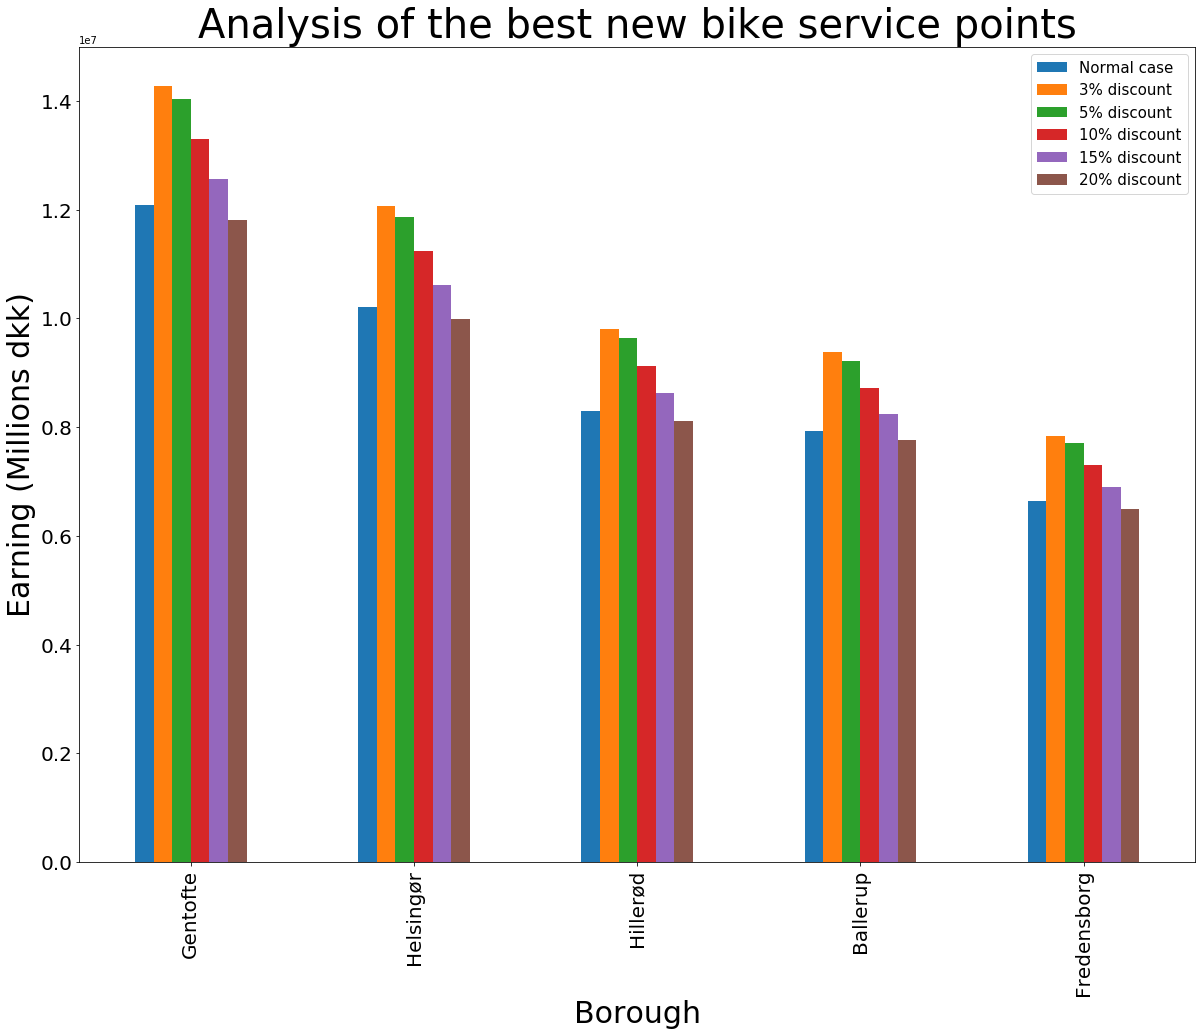

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt


# lets clear our data set to have an easier
#plt.figure(figsize = (20,15) , dpi=500)
#fig = plt.figure
#ax0 = fig.add_subplot(1,1,1)

#first = Top5 

#ax1 = 
labels = ["Normal case" , "3% discount" , "5% discount" ,"10% discount" , "15% discount" , "20% discount"]
#x_section = plotting_data.iloc[: , 1:]

#plt.bar(x = x_section , y= plotting_data["Borough"] , label = labels )



plotting_data.plot(kind = "bar" , figsize = (20,15))

plt.title("Analysis of the best new bike service points" , fontsize = 40)
plt.xlabel ("Borough", fontsize = 30)
plt.ylabel ("Earning (Millions dkk)" ,  fontsize = 30)

plt.legend(labels , fontsize = 15)



plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)


plt.show()








# References

1.  [Cycling in Copenhagen](https://en.wikipedia.org/wiki/Cycling_in_Copenhagen#cite_note-Bicycle_Account-4)
2.  [The main webpage of the technical university of Denmark](https://www.dtu.dk/)
3.  [QS world ranking of the universities](https://www.dtu.dk/Om-DTU/Tal-og-analyser/Ranking/QS-World-University-Rankings)
4.  [fribike shop website](https://www.fribikeshop.dk/service)